# Statements BEGINNER

Esta tabla contiene la información de las sentencias BEGINNER.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [12]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'statement__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('statements')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-26 19:53:30.034229 Data cache files found ...
2024-05-26 19:53:30.897576 Data cache files successfully loaded!!
The dataset contains 457483 (73.83%) instances for BEGINNER class and 162184 (26.17%) for EXPERT class.


In [13]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'statements'
TABLE_FEATURES = ['statement__category', 'statement__parent', 'statement__statement_role', 'statement__height', 'statement__depth', 'statement__has_or_else', 'statement__body_size']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

Features shape: (457483, 7)
As we can see the downloaded data contains a total of 457483 instances. Each of the instances corresponds to a program. For each program we have 7 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [14]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 457483 entries, 0 to 457572
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   statement__category        457483 non-null  object 
 1   statement__parent          457483 non-null  object 
 2   statement__statement_role  457483 non-null  object 
 3   statement__height          457483 non-null  int64  
 4   statement__depth           457483 non-null  int64  
 5   statement__has_or_else     131562 non-null  object 
 6   statement__body_size       134695 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 27.9+ MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 6 de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [15]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [98.34%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [16]:
X.isnull().sum()

statement__category               0
statement__parent                 0
statement__statement_role         0
statement__height                 0
statement__depth                  0
statement__has_or_else       325921
statement__body_size         322788
dtype: int64

Los nulos se deben a que esos campos solo son aplicables para ciertas categorias

In [17]:
print_empty_cols(X)

statement__category
-------------------
0 instancias no tienen un valor para la columna statement__category


statement__parent
-----------------
0 instancias no tienen un valor para la columna statement__parent


statement__statement_role
-------------------------
0 instancias no tienen un valor para la columna statement__statement_role


statement__height
-----------------
0 instancias no tienen un valor para la columna statement__height


statement__depth
----------------
0 instancias no tienen un valor para la columna statement__depth


statement__has_or_else
----------------------
0 instancias no tienen un valor para la columna statement__has_or_else


statement__body_size
--------------------
0 instancias no tienen un valor para la columna statement__body_size




### 2.4 - Describimos los valores de las variables de la tabla.

In [18]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
statement__category,457483,18,AssignmentStmt,202657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__parent,457483,9,FunctionDef,170674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__statement_role,457483,17,IfBody,110978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__height,457483.0,NaN,NaN,NaN,3.444296,2.181544,1.0,2.0,3.0,4.0,40.0
statement__depth,457483.0,NaN,NaN,NaN,2.903843,2.135892,0.0,1.0,3.0,4.0,82.0
statement__has_or_else,131562,2,False,97194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__body_size,134695.0,NaN,NaN,NaN,1.833312,2.116563,1.0,1.0,1.0,2.0,135.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [19]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "statement__depth": [(0.0, 1.0), (1.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 0.0 max: 82.0
    "statement__height": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 1.0 max: 54.0
    "statement__body_size": [(-1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 1.0 max: 276
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['statement__depth'], 10))
print(get_statistics(X_copy, ['statement__height'], 10))
print(get_statistics(X_copy, ['statement__body_size'], 10))
print(get_statistics(X_copy, ['statement__category'], 10))
print(get_statistics(X_copy, ['statement__parent'], 10))
print(get_statistics(X_copy, ['statement__statement_role'], 10))
print(get_statistics(X_copy, ['statement__has_or_else'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
statement__depth  count  percentage
       [1.0_3.0) 174241   38.086880
       [4.0_inf] 144744   31.639208
       [3.0_4.0)  98920   21.622661
       [0.0_1.0)  39578    8.651250

statement__height  count  percentage
        [4.0_inf] 173161   37.850805
        [3.0_4.0) 142138   31.069570
        [2.0_3.0)  89894   19.649692
        [0.0_2.0)  52290   11.429933

statement__body_size  count  percentage
             unknown 322788   70.557376
           [1.0_2.0)  83933   18.346693
           [2.0_inf]  50762   11.095931

statement__category  count  percentage
     AssignmentStmt 202657   44.298258
                 If  93851   20.514642
             Return  56571   12.365705
                For  22067    4.823567
         ImportFrom  16383    3.581117
             Import  11370    2.485338
              Raise  11037    2.412549
AugmentedAssignment   9984    2.182376
                Try   8953    1.957013
              While   6691    1.462568

statement__parent  

In [20]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (457483, 49)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

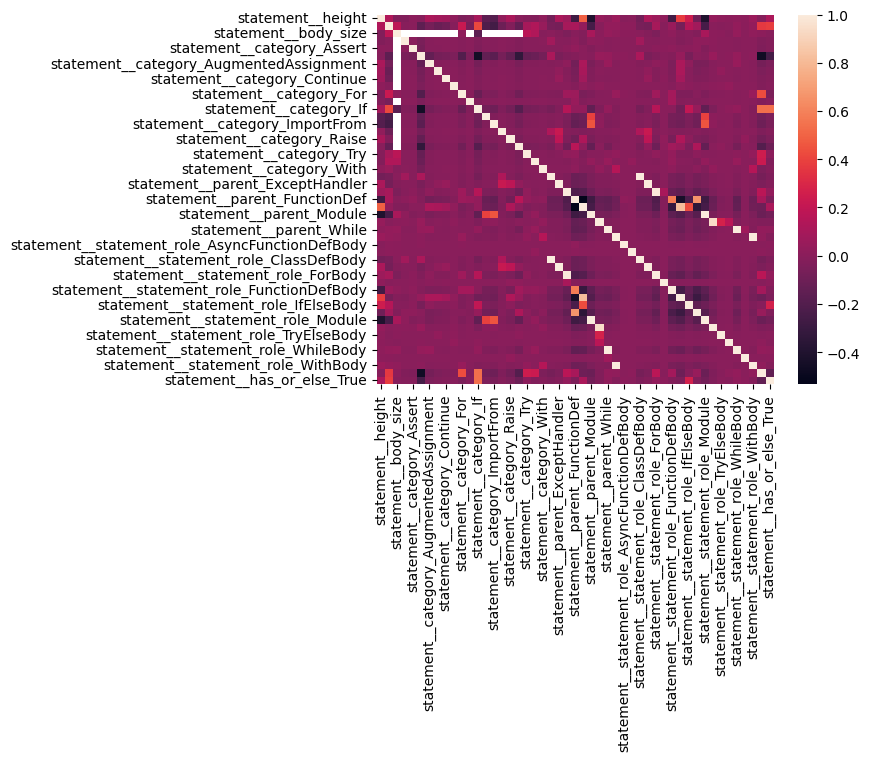

In [21]:
sns.heatmap(X.corr(), annot=False)

Se aprecian muchas relaciones pero habrá que mirar como mejorar este diagrama para que sea legible

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 7 variable (1 booleanas, 3 numericas y 3 categóricas) se hara un analisis detallado 

### Variable has_or_else (1/7)
Esta variable es de tipo booleano y representa si ciertas categorias de statements tienen la clausula else. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

KeyError: 'statement__has_or_else'

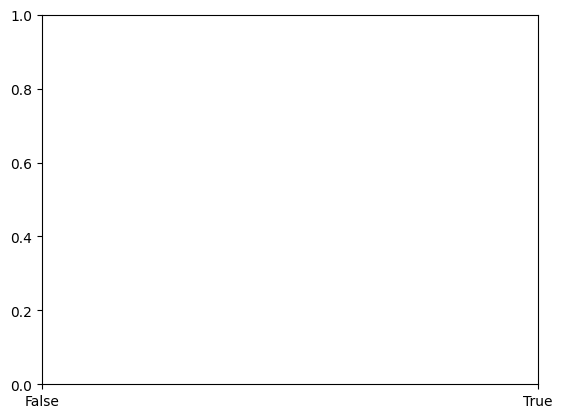

In [22]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['statement__has_or_else'], discrete=True)

In [ ]:
num_true_values = len(X[X['statement__has_or_else'] == True])
num_false_values = len(X[X['statement__has_or_else'] == False])
std = X['statement__has_or_else'].std()
freq_true = len(X[X['statement__has_or_else'] == True]) / len(X['statement__has_or_else'])
freq_false = len(X[X['statement__has_or_else'] == False]) / len(X['statement__has_or_else'])
print(f'La variable has_or_else contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a False es {freq_false}.')

No suma el 100% debido a los valores nulos

In [ ]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'statement__has_or_else', possible_values)

In [ ]:
X[X['statement__has_or_else'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


### Variable height (2/7)
Esta variable representa la distancia del statement al root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 54. Con una media de 3.176.

In [ ]:
sns.stripplot(X['statement__height'])

In [ ]:
print_outliers_for_df_column(X, 'statement__height')

In [ ]:
X[X['statement__height'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

### Variable depth (3/7)
Esta variable representa la distancia desde el statement hasta una hoja del ast. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 82. Con una media de 2.8496.

In [ ]:
sns.stripplot(X['statement__depth'])

In [ ]:
print_outliers_for_df_column(X, 'statement__depth')

In [ ]:
X[X['statement__depth'] > 13].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

### Variable body_size (4/7)
Esta variable representa el número de sentencias o expresiones que se definen dentro del cuerpo de ciertas categorías de sentencias. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 276. Con una media de 1.8938.

In [ ]:
sns.stripplot(X['statement__body_size'])

In [ ]:
print_outliers_for_df_column(X,'statement__body_size')

In [ ]:
X[X['statement__body_size'] > 50].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

### Variable category (5/7)
Esta variable es de tipo categórica y representa el tipo de sentencia.

In [ ]:
sns.catplot(full_table['statement__category'], kind="count")

In [ ]:
print_frequency_anal_for_cat_var(full_table, 'statement__category')

### Variable parent (6/7)
Esta variable es de tipo categórica y representa el tipo del padre de la sentencia.

In [ ]:
sns.catplot(full_table['statement__parent'], kind="count")

In [ ]:
print_frequency_anal_for_cat_var(full_table, 'statement__parent')

### Variable statement_role (7/7)
Esta variable es de tipo categórica y representa el rol que representa la sentencia en su padre.

In [ ]:
sns.catplot(full_table['statement__statement_role'], kind="count")

In [ ]:
print_frequency_anal_for_cat_var(full_table, 'statement__statement_role')